# Fiducial Marker Matching Alignment Example Notebook

In [1]:
import pandas as pd
import numpy as np
from seqfish_fm_match import FMMatcher
import matplotlib.pyplot as plt
import cv2
from watermark import watermark
print(watermark())
print(watermark(packages="pandas,numpy,scipy,seqfish_fm_match,cv2"))

Last updated: 2025-06-12T11:40:36.522311-07:00

Python implementation: CPython
Python version       : 3.13.3
IPython version      : 9.3.0

Compiler    : MSC v.1943 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 63 Stepping 2, GenuineIntel
CPU cores   : 72
Architecture: 64bit

pandas          : 2.2.3
numpy           : 2.1.2
scipy           : 1.14.1
seqfish_fm_match: 0.0.1
cv2             : 4.10.0



### Read in example data

In [2]:
ref_init = pd.read_csv("../example_data/in_channel/initial_reference.csv")
ref_final = pd.read_csv("../example_data/in_channel/final_reference.csv")
ro = pd.read_csv("../example_data/in_channel/bright_ro_dots.csv")

Example data is from channel 561 of position 4 in replicate 2 of the original seqFISH+ NIH3T3 cell experiment. It was chosen for its small size. x and y distance units are in pixels. Intensity units are arbitrary.

### Look at the data

In [3]:
ref_init.head()

,x,y,z,int
0,31.999543,1080.999984,0,17773.627270
1,114.754283,544.884195,0,6868.670956
2,86.710022,1613.105294,0,3367.605233
3,421.228328,864.232003,0,3608.949352
4,680.397582,491.218607,0,3503.164018


In [4]:
ref_final.head()

,x,y,z,int
0,31.999262,1080.999826,0,17956.057860
1,115.548279,540.132421,0,4546.240240
2,730.826144,424.953615,0,3666.393698
3,792.032219,473.490937,0,4207.299912
4,823.372502,1016.670800,0,9650.076824


In [5]:
ro.head()

,hyb,x,y,z,int
0,0,31.999691,1081.000000,0,17634.928440
1,0,115.753690,544.112930,0,8089.031985
2,0,87.782786,1612.176181,0,3768.478697
3,0,272.071022,1516.792724,0,3625.500395
4,0,422.286671,863.441670,0,3874.274898


### Index the readout dataframe by the hyridization in which the dots were found

In [6]:
ro.set_index("hyb", inplace=True)
ro.head()

,x,y,z,int
hyb,,,,
0,31.999691,1081.000000,0,17634.928440
0,115.753690,544.112930,0,8089.031985
0,87.782786,1612.176181,0,3768.478697
0,272.071022,1516.792724,0,3625.500395
0,422.286671,863.441670,0,3874.274898


### Create the FMAligner Object

In [7]:
dm = FMMatcher(ro, ref_init, ref_final)

Finding Reference Edges


### Auto find parameters. 
This does a grid search for parameters that work well in matching the initial and final reference fiducial marker patterns, so it might take a few minutes.

In [8]:
dm.auto_set_params()

Finding Reference Edges
Finding Reference Edges
n well matched: 66 ; n trav matched: 66 ; n unmatched: 33 ; n_ambiguous: 0
offsets and SEs: [np.float64(-0.8369355769230802), np.float64(4.606873954307701), np.float64(0.0), np.float64(0.012179934884229797), np.float64(0.015487018929933007), np.float64(0.0), 65]
Finding Reference Edges
Finding Reference Edges
n well matched: 66 ; n trav matched: 66 ; n unmatched: 33 ; n_ambiguous: 0
offsets and SEs: [np.float64(-0.8369355769230802), np.float64(4.606873954307701), np.float64(0.0), np.float64(0.012179934884229797), np.float64(0.015487018929933007), np.float64(0.0), 65]
Finding Reference Edges
Finding Reference Edges
n well matched: 66 ; n trav matched: 66 ; n unmatched: 33 ; n_ambiguous: 0
offsets and SEs: [np.float64(-0.8369355769230802), np.float64(4.606873954307701), np.float64(0.0), np.float64(0.012179934884229797), np.float64(0.015487018929933007), np.float64(0.0), 65]
Finding Reference Edges
Finding Reference Edges
n well matched: 66 

(          ref_x        ref_y  ref_z hyb       comp_x       comp_y  comp_z  \
 0    957.787527     0.819449    0.0   1   956.834479     5.532409     0.0   
 1   1438.691631    70.483469    0.0   1  1437.937916    75.041828     0.0   
 2   1348.463586    57.614893    0.0   1  1347.560147    62.276840     0.0   
 3   1182.296573    64.951601    0.0   1  1181.387987    69.713122     0.0   
 4   1054.932726  2012.937733    0.0   1  1054.108927  2017.612691     0.0   
 ..          ...          ...    ...  ..          ...          ...     ...   
 68  1100.589905   972.949123    0.0   1  1099.940726   977.025415     0.0   
 69   823.372502  1016.670800    0.0   1   821.908400  1021.067935     0.0   
 70   945.237857  1714.186392    0.0   1   944.365232  1718.773118     0.0   
 71  1278.947693  2009.025052    0.0   1  1278.036489  2013.648340     0.0   
 72  1087.707253  1870.571115    0.0   1  1086.815732  1875.081815     0.0   
 
         comp_int    aligned_x    aligned_y  aligned_z      re

### You can save and load the parameters

In [9]:
dm.save_params("saved_parameters.csv")

ref_init = pd.read_csv("../example_data/in_channel/initial_reference.csv")
ref_final = pd.read_csv("../example_data/in_channel/final_reference.csv")
dm2 = FMMatcher(ro, ref_init, ref_final)
dm2.load_saved_parameters("saved_parameters.csv")

Finding Reference Edges


### Alternatively, set the search parameters manually. Only one set of reference fiducial markers is necessary if you do this.


In [10]:
ref_init = pd.read_csv("../example_data/in_channel/initial_reference.csv")
dm3 = FMMatcher(ro, ref_init)

Finding Reference Edges


These parameters must be set manually if you do not run the auto_set_params method


In [11]:
dm3.set_xy_search_error(0.39) # The lateral position vectors between pairs of fiducial markers in the reference
                               # and readout images are allowed to differy by 0.39 distance units
    
dm3.set_z_search_error(0) # the z position vectors between pairs of fiducial markers in the reference
                               # and readout images are allowed to differ by 0 distance units (the example data is 2D)
    
dm3.set_min_bright_prop(0.18) # the intensity of readout dots matched to reference dots must be at least 0.18 times 
                               # the reference intensity
    
dm3.set_max_bright_prop(3.7) # the intensity of readout dots matched to reference dots must be no more than 3.7
                              # times the reference intensity

These parameters have a default value, and to not require, but allow user tuning. Default values are set here.

In [12]:
dm3.set_min_edge_match(5) # readout dots must be matched in at least 5 fiducial marker pairs to be considered well match

dm3.set_n_longest_edges(30*len(ref_init.x)) # index this many of the farthest apart pairs of fiducial markers in the 
                                             # reference imageto search for initial matches in each hybs
    
dm3.set_n_unmatch_give_up(100) # If after finding an inital fatching pair, the first 100 other reference fiducial markers
                                #searched for are not found, consider the initial match a false match
    
dm3.set_min_dot_matches(10) # fiducial marker pattern matches finding fewer than 10 dots in the readout are failures.

dm3.set_outlier_sd_thresh(3.0) # remove fiducial that drift a distance of z-score 3 or greater than the others

dm3.set_min_fm_hyb_matches(int((max(ro.index)-min(ro.index))/2)) # fiducial markers should be found at in at least
                                                                            # half of the hybridizations

Finding Reference Edges


These parameters are optional and ommited by default, but can help speed up the computation if provided

In [13]:
dm3.set_max_lat_offset(500) # only match dots in readout images that have drifted less than 500 lateral distance units 
                             # from their location in the reference image
dm3.set_max_z_offset(10) # only match dots in readout stacks that have drifted less than 10 z distance units 
                          # from their location in the reference stack.

## Run the Alignment

In [14]:
dm.align()

Aligning hybridization 0
n well matched: 91 ; n trav matched: 235 ; n unmatched: 39 ; n_ambiguous: 0
offsets and SEs: [np.float64(0.953295199655173), np.float64(-0.7818040247816181), np.float64(0.0), np.float64(0.007894202142827381), np.float64(0.005979643501540495), np.float64(0.0), 87]
Aligning hybridization 1
n well matched: 83 ; n trav matched: 209 ; n unmatched: 123 ; n_ambiguous: 0
offsets and SEs: [np.float64(1.4177611493506466), np.float64(-0.5006499460909215), np.float64(0.0), np.float64(0.008526428402310729), np.float64(0.008232844205103378), np.float64(0.0), 77]
Aligning hybridization 2
n well matched: 82 ; n trav matched: 211 ; n unmatched: 99 ; n_ambiguous: 0
offsets and SEs: [np.float64(1.700820881578951), np.float64(-0.29482849419736956), np.float64(0.0), np.float64(0.007611299703538522), np.float64(0.005930985623651547), np.float64(0.0), 76]
Aligning hybridization 3
n well matched: 80 ; n trav matched: 214 ; n unmatched: 87 ; n_ambiguous: 0
offsets and SEs: [np.float64(

(    hyb         x         y    z      x_SE      y_SE  z_SE  n_matches
 0     0  0.953295 -0.781804  0.0  0.007894  0.005980   0.0         87
 1     1  1.417761 -0.500650  0.0  0.008526  0.008233   0.0         77
 2     2  1.700821 -0.294828  0.0  0.007611  0.005931   0.0         76
 3     3  1.009851 -0.180141  0.0  0.007599  0.008570   0.0         75
 4     4  0.830480 -0.149615  0.0  0.007187  0.007166   0.0         75
 ..  ...       ...       ...  ...       ...       ...   ...        ...
 76   76  2.373315 -2.655393  0.0  0.014264  0.018030   0.0         77
 77   77  2.216155 -2.802097  0.0  0.010211  0.014378   0.0         64
 78   78  1.879703 -2.929687  0.0  0.010732  0.015741   0.0         66
 79   79  1.221861 -3.056201  0.0  0.018117  0.020003   0.0         35
 80   80  1.087535 -2.940679  0.0  0.010753  0.018287   0.0         69
 
 [81 rows x 8 columns],
           ref_x        ref_y  ref_z      ref_int hyb  loocv_align_x  \
 0    114.754283   544.884195    0.0  6868.670956 

### View the results

In [15]:
dm.offsets

,hyb,x,y,z,x_SE,y_SE,z_SE,n_matches
0,0,0.953295,-0.781804,0.0,0.007894,0.005980,0.0,87
1,1,1.417761,-0.500650,0.0,0.008526,0.008233,0.0,77
2,2,1.700821,-0.294828,0.0,0.007611,0.005931,0.0,76
3,3,1.009851,-0.180141,0.0,0.007599,0.008570,0.0,75
4,4,0.830480,-0.149615,0.0,0.007187,0.007166,0.0,75
...,...,...,...,...,...,...,...,...
76,76,2.373315,-2.655393,0.0,0.014264,0.018030,0.0,77
77,77,2.216155,-2.802097,0.0,0.010211,0.014378,0.0,64
78,78,1.879703,-2.929687,0.0,0.010732,0.015741,0.0,66
79,79,1.221861,-3.056201,0.0,0.018117,0.020003,0.0,35


### View error estimates

In [16]:
dm.loocv_alignment_errors

,ref_x,ref_y,ref_z,ref_int,hyb,loocv_align_x,loocv_align_y,loocv_align_z,comp_int,x_diff,y_diff,z_diff
0,114.754283,544.884195,0.0,6868.670956,0,114.807334,544.896822,0.0,8089.031985,0.053051,0.012627,0.0
1,114.754283,544.884195,0.0,6868.670956,1,114.747028,544.817715,0.0,5899.712727,-0.007255,-0.066480,0.0
2,114.754283,544.884195,0.0,6868.670956,2,114.772333,544.810969,0.0,5570.644691,0.018050,-0.073226,0.0
3,114.754283,544.884195,0.0,6868.670956,3,114.746305,544.897027,0.0,6709.645106,-0.007978,0.012832,0.0
4,114.754283,544.884195,0.0,6868.670956,4,114.761948,544.869701,0.0,7184.663680,0.007665,-0.014494,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
74,1942.005954,1138.569406,0.0,9798.582014,74,1941.971565,1138.274608,0.0,5674.030592,-0.034389,-0.294798,0.0
75,1942.005954,1138.569406,0.0,9798.582014,75,1942.280920,1138.317777,0.0,6689.730733,0.274966,-0.251629,0.0
76,1942.005954,1138.569406,0.0,9798.582014,76,1942.003800,1138.198020,0.0,7518.567025,-0.002154,-0.371386,0.0
78,1942.005954,1138.569406,0.0,9798.582014,78,1941.898878,1138.125965,0.0,6692.708334,-0.107076,-0.443441,0.0


### Plot Mean Square Leave-One-Out Cross Validation Error Estimates

Text(0, 0.5, 'RMS Leave-One-Out Cross Validation Error (nm)')

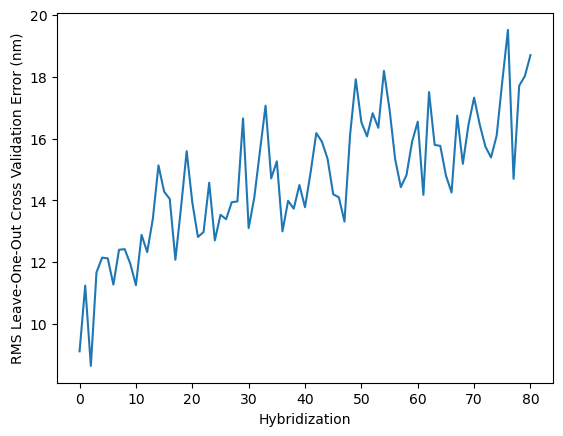

In [17]:
dm.loocv_alignment_errors.loc[:,'latdiffsq'] = dm.loocv_alignment_errors.x_diff**2 + dm.loocv_alignment_errors.y_diff**2

nm_per_pixel = 103
mean_square_errors = dm.loocv_alignment_errors.groupby('hyb').mean()['latdiffsq']
plt.plot(np.sqrt(mean_square_errors) * 103)
plt.xlabel("Hybridization")
plt.ylabel("RMS Leave-One-Out Cross Validation Error (nm)")

### Save the results

In [18]:
dm.save_offsets("offsets_all.csv")

### It is useful to save leave-one-out cross validation error estimates for the alignment shifts and records of which readout dots matched to which reference dots.

In [19]:
dm.save_loocv_errors("loov_errors_all.csv")

dm.save_matches("matches_all.csv")